# Preâmbulo

Filtros Passa baixa no dominio da frequencia

# Código

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
def define_filtro_distancia(altura,largura):
    base_filter = np.zeros((altura,largura,2),np.float32)
    for x in range(0,altura):
        for y in range(0,largura):
            for z in range(0,2):
                base_filter[x][y][z] = np.sqrt((x - altura/2)**2 + (y - largura/2)** 2)
    
    return base_filter

In [11]:
def define_filtro_butterworth(filtro_distancia,limiar,n):
    altura, largura, profundidade = filtro_distancia.shape
    filtro_butterworth = np.zeros((altura,largura,profundidade),np.float32)
    for x in range(0,altura):
        for y in range(0,largura):
            for z in range(0,profundidade):
                filtro_butterworth[y][x][z] = 1/ (1 + (filtro_distancia[y][x][z]/limiar) ** (2 * n))
    
    return filtro_butterworth

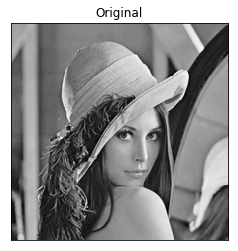

In [4]:
imgname = 'lenna.png'

img = cv2.imread(imgname,0)
plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
fourier_img = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
shift_img = np.fft.fftshift(fourier_img)

In [6]:
altura, largura = img.shape
limiar = 30
n_butterworth = 10
filtro_distancia = define_filtro_distancia(altura,largura)

In [8]:
ideal_filter = np.float32(filtro_distancia <= limiar)
filtered_img_ideal = shift_img * ideal_filter

ideal_img = cv2.idft(np.fft.ifftshift(filtered_img_ideal))
ideal_img = cv2.magnitude(ideal_img[:,:,0], ideal_img[:,:,1])

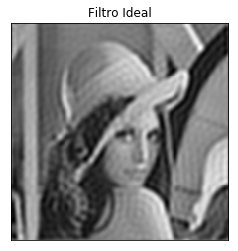

In [9]:
plt.imshow(ideal_img,cmap = 'gray')
plt.title('Filtro Ideal'), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
butterworth_filter = define_filtro_butterworth(filtro_distancia,limiar,n_butterworth)
filtered_img_butter = shift_img * butterworth_filter

butter_img = cv2.idft(np.fft.ifftshift(filtered_img_butter))
butter_img = cv2.magnitude(butter_img[:,:,0], butter_img[:,:,1])

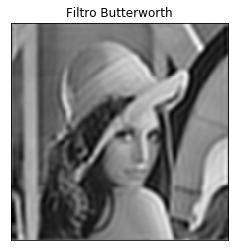

In [20]:
plt.imshow(butter_img,cmap = 'gray')
plt.title('Filtro Butterworth'), plt.xticks([]), plt.yticks([])
plt.show()

# Resultados

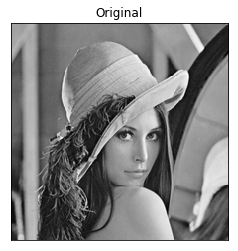

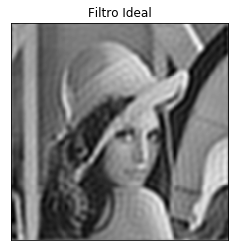

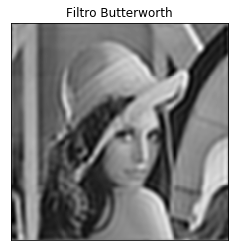

# Análises

Como podemos observar o filtro ideal apresenta uma suavização da imagem, poreḿ ele tambem gera imagens mais espúrias, isso devido ao fenomeno de Gibs.

Já o filtro Butterworth apresenta uma melhora das distorções em relação ao filtro ideal, porém ainda apresenta um resquicio de fantasmas na imagem gerada.